In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import sys
from pathlib import Path

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.load_gfa import load_gfa

## Didelot

In [ ]:
didelot=pd.read_csv("didelot-summary-gfa.csv")

In [ ]:
didelot

In [ ]:
# fig=px.treemap(
#     names=[],
#     parents=[]
# )

In [ ]:
fig = px.treemap(didelot, path=["gfa_id", "tool", "msa"], values="n_nodes")#,"n_edges","len_graph"])

In [ ]:
fig.show()

## Distribution of nodes

In [14]:
from utils.load_gfa import load_gfa
from collections import namedtuple, defaultdict

In [3]:
path_gfa0 = "/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/gfa-unchop/nodes/penalization0-min_len0/coli27-86.fasta.gfa"
path_gfa1 = "/data/pangeblocks-experiments/didelot-makeprg/output-didelot-mafft.op1.53-ep0/coli27-86.fasta.gfa"
path_gfa2 = "/data/pangeblocks-experiments/didelot-PanPA/output-didelot-mafft.op1.53-ep0/coli27-86.fasta.gfa"
path_gfa3 = "/data/pangeblocks-experiments/didelot-pggb/coli27-86/coli27-86.fasta.gz.3903904.417fcdf.6b51920.smooth.final.gfa"

In [4]:
paths_gfa=[path_gfa0, path_gfa1, path_gfa2]# path_gfa3]

In [5]:
Path(path_gfa0).stem + Path(path_gfa0).parents[-4].stem

'coli27-86.fastadidelot-pangeblocks'

In [6]:
d = []
Data = namedtuple("Data",["gfa_id","len_node"])
for n,path_gfa in enumerate(paths_gfa):
    gfa_id = n#Path(path_gfa).stem + "-" + Path(path_gfa0).parents[-4].stem
    nodes, edges, paths = load_gfa(path_gfa)
    
    for idnode, node in nodes.items():
        d.append(Data(gfa_id, node["len"]))
    # d[f"gfa{n}"] = [v["len"] for v in nodes.values()]


In [7]:
df = pd.DataFrame(d)
df

,gfa_id,len_node
0,0,1
1,0,1
2,0,1
3,0,1
4,0,5
...,...,...
5356,2,1
5357,2,1
5358,2,1
5359,2,1


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

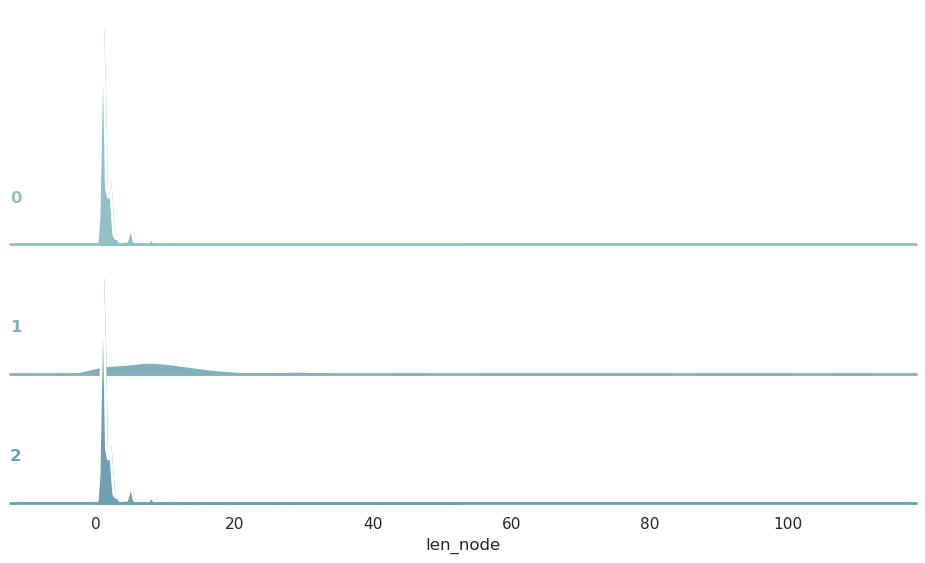

In [9]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="gfa_id", hue="gfa_id", aspect=5, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "len_node",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "len_node", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "len_node")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

## Node depth distribution
node depth: number of sequences using the node

In [55]:
import pandas as pd 
import seaborn as sns

In [56]:
def get_node_depth(path_gfa, tool=None):
    nodes, edges, paths = load_gfa(path_gfa, True)

    node_depth = defaultdict(int)
    for seq_id, nodes in paths.items():
        for node in nodes: 
            node_depth[node] += 1

    df_depth = pd.DataFrame(node_depth.items(), columns=["nodeid", "node_depth"],)
    if tool: 
        df_depth["tool"] = tool
    
    return df_depth

In [62]:
df_depth = pd.concat([get_node_depth(p, tool) for p, tool in zip([path_gfa0, path_gfa2], ["pblocks", "panpa"])])

In [63]:
df_depth


,nodeid,node_depth,tool
0,1970,27,pblocks
1,2,26,pblocks
2,2230,27,pblocks
3,4,26,pblocks
4,5,27,pblocks
...,...,...,...
2249,4180,1,panpa
2250,1450,1,panpa
2251,1494,1,panpa
2252,2683,1,panpa


<Axes: xlabel='node_depth', ylabel='Count'>

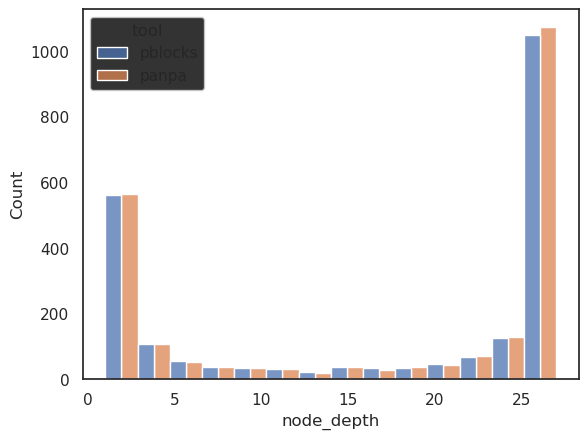

In [68]:
sns.histplot(df_depth, x="node_depth", hue="tool", multiple="dodge")